In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./data/particulate.csv", sep=";")
print(df.columns)


Index(['idStudy', 'idIstat', 'Province', 'itCode', 'Exceedances',
       'StationsNum', 'Cases', 'Population', 'Density', 'Long', 'Lat', 'Where',
       'Commuters', 'CommutersDensity', 'ExcedRatio25'],
      dtype='object')


In [17]:
population = df["Population"].values
commutersdensity = df["CommutersDensity"].values
density = df["Density"].values

features = np.stack((population, commutersdensity, density), axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


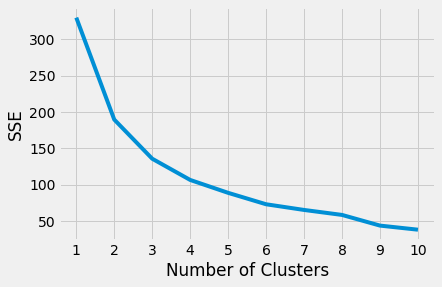

In [18]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

print(kl.elbow)

3


In [29]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(scaled_features)

cities = df["Province"].values
where = df["Where"].values
population = df["Population"].values

for i, clusterid in enumerate(kmeans.labels_):
    if clusterid == 0:
        print(clusterid, cities[i], where[i], population[i])

for i, clusterid in enumerate(kmeans.labels_):
    if clusterid == 1:
        print(clusterid, cities[i], where[i], population[i])

for i, clusterid in enumerate(kmeans.labels_):
    if clusterid == 2:
        print(clusterid, cities[i], where[i], population[i])

0 Agrigento south 434870
0 Laquila south 299031
0 Avellino south 418306
0 Bari south 1251994
0 Benevento south 277018
0 Brindisi south 392975
0 BarlettaAndriaTrani south 390011
0 Campobasso south 221238
0 Caserta south 922965
0 Chieti south 385588
0 CarboniaIglesias south 127133
0 Caltanissetta south 262458
0 Cosenza south 705753
0 Catania south 1107702
0 Catanzaro south 358316
0 Enna south 164788
0 Foggia south 622183
0 Frosinone south 489083
0 Grosseto south 221629
0 Imperia south 213840
0 Isernia south 84379
0 Crotone south 174980
0 Lecce south 795134
0 Latina south 575254
0 Messina south 626876
0 MassaCarrara south 194878
0 Matera south 197909
0 Nuoro south 208550
0 Oristano south 157707
0 OlbiaTempio south 160368
0 Palermo south 1252588
0 Pescara south 318909
0 Potenza south 364960
0 ReggioCalabria south 548009
0 Ragusa south 320893
0 Rieti south 155503
0 Salerno south 1098513
0 LaSpezia south 219556
0 Siracusa south 399224
0 Sassari south 491571
0 Savona south 276064
0 Taranto so